# London Weather Data CNN

In [243]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

## Importing the dataset

In [244]:
!cp "/content/drive/MyDrive/Colab Notebooks/London/london_weather.csv" "/content/londonweather.csv"

In [245]:
df = pd.read_csv('/content/londonweather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [246]:
df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [247]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')
df[:25]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
1979-01-06,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
1979-01-07,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
1979-01-08,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
1979-01-09,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0


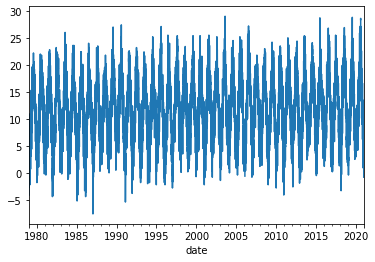

In [248]:
temp = df['mean_temp']
temp.plot()

In [249]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
df['mean_temp'] = df['mean_temp'].interpolate()

In [250]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [251]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((15311, 30, 1), (15311,))

## Splitting the dataset

In [252]:
X_train1, y_train1 = X1[:12248], y1[:12248]
X_val1, y_val1 = X1[12248:13780], y1[12248:13780]
X_test1, y_test1 = X1[13780:], y1[13780:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((12248, 30, 1), (12248,), (1532, 30, 1), (1532,), (1531, 30, 1), (1531,))

## Building the network

In [253]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((30, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(32, 'relu'))
model2.add(Dense(16, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 29, 64)            192       
                                                                 
 flatten_10 (Flatten)        (None, 1856)              0         
                                                                 
 dense_27 (Dense)            (None, 32)                59424     
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 60,161
Trainable params: 60,161
Non-trainable params: 0
_________________________________________________________________


In [254]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## Training

In [255]:
history1 = model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp2])

Epoch 1/100
383/383 [==============================] - 3s 5ms/step - loss: 20.5741 - root_mean_squared_error: 4.5359 - val_loss: 5.4367 - val_root_mean_squared_error: 2.3317
Epoch 2/100
383/383 [==============================] - 2s 5ms/step - loss: 5.0536 - root_mean_squared_error: 2.2480 - val_loss: 3.8293 - val_root_mean_squared_error: 1.9569
Epoch 3/100
383/383 [==============================] - 2s 5ms/step - loss: 4.0622 - root_mean_squared_error: 2.0155 - val_loss: 3.5520 - val_root_mean_squared_error: 1.8847
Epoch 4/100
383/383 [==============================] - 2s 5ms/step - loss: 3.7765 - root_mean_squared_error: 1.9433 - val_loss: 3.3800 - val_root_mean_squared_error: 1.8385
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 3.6735 - root_mean_squared_error: 1.9166 - val_loss: 3.5239 - val_root_mean_squared_error: 1.8772
Epoch 6/100
383/383 [==============================] - 2s 5ms/step - loss: 3.6174 - root_mean_squared_error: 1.9020 - val_loss: 3.3515

In [256]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

## Model results

In [257]:
train_predictions1 = model2.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,0.548131,2.1
1,1.968251,5.2
2,3.214936,2.8
3,2.338789,0.9
4,1.384694,1.6
...,...,...
12243,15.764640,19.2
12244,19.178207,19.8
12245,19.138184,20.9
12246,20.069811,19.4


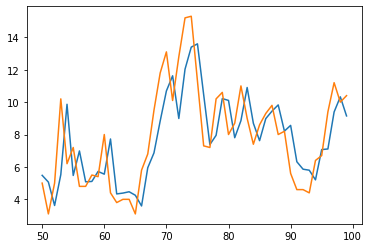

In [258]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [259]:
val_predictions1 = model2.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,20.497635,19.2
1,18.798708,21.2
2,20.774185,20.5
3,19.933781,19.4
4,19.042744,23.2
...,...,...
1527,13.589882,11.8
1528,11.621252,11.2
1529,11.459710,11.6
1530,11.953005,10.4


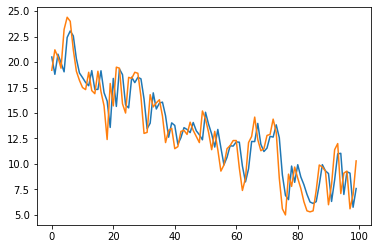

In [260]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [261]:
test_predictions1 = model2.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,10.184905,10.0
1,10.332891,11.4
2,11.609278,11.8
3,11.727304,13.0
4,12.721094,12.2
...,...,...
1526,6.000101,7.5
1527,7.795432,1.1
1528,1.378104,2.6
1529,3.837806,2.7


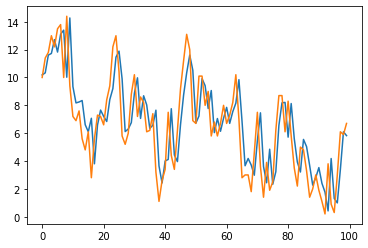

In [262]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

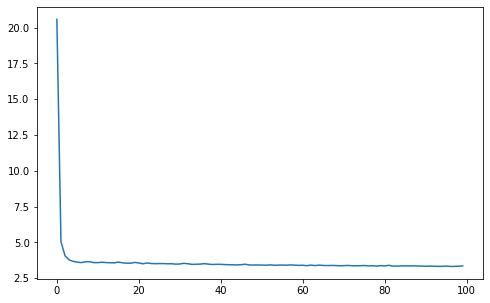

In [263]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

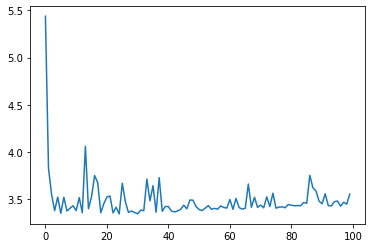

In [264]:
plt.plot(history1.history['val_loss'])

In [265]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       10.184905     10.0
 1       10.332891     11.4
 2       11.609278     11.8
 3       11.727304     13.0
 4       12.721094     12.2
 ...           ...      ...
 1526     6.000101      7.5
 1527     7.795432      1.1
 1528     1.378104      2.6
 1529     3.837806      2.7
 1530     3.661047     -0.8
 
 [1531 rows x 2 columns], 4.127277789740106)

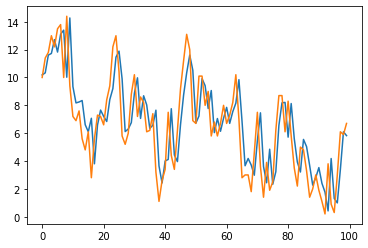

In [266]:
plot_predictions1(model2, X_test1, y_test1)